In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# https://www.akshare.xyz/zh_CN/latest/introduction.html
import akshare as ak
import json
import pandas as pd
import rui_risk_kit as rrk
import fastquotes

In [2]:
with open('assets.json','r') as myfile:
    data=myfile.read()

porfolio = json.loads(data)

# 构建开放式基金以及货币基金的列表
open_mutual_fund_list = []
currency_mutual_fund_list = []

for open_fund in porfolio['open_fund_in_porfolio']:
    open_mutual_fund_list.append(open_fund)

for currency_fund in porfolio['currency_fund_in_portfolio']:
    currency_mutual_fund_list.append(currency_fund)

In [3]:
currency_fund_info_df = rrk.get_currency_fund_values(currency_mutual_fund_list)
fund_em_info_df = rrk.get_mf_values(open_mutual_fund_list, indicator='累计净值走势')

# concatenate DataFrame(currency_fund_info_df) to Dataframe(fund_em_info_df)
fund_em_info_df = pd.concat([fund_em_info_df, currency_fund_info_df], axis=1)
portfolio_fund_list = open_mutual_fund_list + currency_mutual_fund_list
fund_em_info_df.tail()

,004342,163406,001714,003095,003096,161725,502056,005918,002963,213009,004972
净值日期,,,,,,,,,,,
2021-06-23,2.237,8.0103,3.833,4.300,4.249,3.0790,1.6832,1.4357,1.2721,0.7385,0.7073
2021-06-24,2.2408,8.0160,3.832,4.191,4.141,3.0916,1.6567,1.4383,1.2672,0.5411,0.7277
2021-06-25,2.2749,8.0829,3.863,4.312,4.260,3.1216,1.7038,1.4616,1.2680,0.5438,0.7671
2021-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7664
2021-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7664


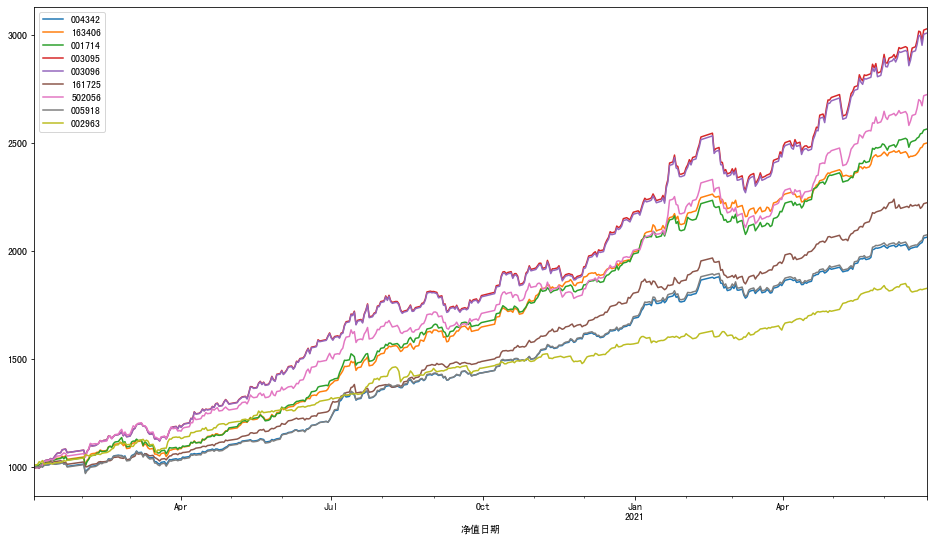

In [4]:
btr = rrk.run_cppi(fund_em_info_df['2020':][open_mutual_fund_list].pct_change().dropna(), drawdown = 0.2)
ax = btr['Wealth'].plot(figsize=(16,9), legend=True)
# btr['Risky Wealth'].plot(ax=ax, style='--', legend=True)

In [67]:
rrk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
004342,0.016210,0.019772,-0.616221,10.112434,0.008162,0.013044,-0.678843,-0.058382
163406,0.020501,0.022802,-0.850447,7.687748,0.009981,0.015714,-0.405488,-0.068528
001714,0.021032,0.023852,-0.755574,6.546531,0.010467,0.016384,-0.365944,-0.070703
003095,0.024967,0.031111,-0.389299,4.861136,0.013292,0.020235,-0.157498,-0.103670
003096,0.024812,0.031094,-0.389580,4.871152,0.013295,0.020232,-0.162422,-0.103806
161725,0.017940,0.017022,-0.744709,8.199414,0.007053,0.010982,-0.689529,-0.061006
502056,0.022528,0.028082,-0.319556,4.756153,0.011864,0.017756,-0.258984,-0.095452
005918,0.016330,0.021139,-0.611602,9.908281,0.008826,0.014059,-0.629389,-0.063963
002963,0.013247,0.016700,-0.724036,11.059454,0.006974,0.011346,-0.976365,-0.054120


In [19]:
rrk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
003095,0.014437,0.058319,-0.239721,4.287805,0.027033,0.039009,-0.259794,-0.374309
110011,0.013061,0.044874,-0.241194,5.112846,0.020453,0.028738,-0.367429,-0.269118
001714,0.012094,0.044975,-0.320532,5.138129,0.020857,0.029735,-0.387533,-0.204315
